## Histograms, Binnings(구간화), and Density

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

data = np.random.randn(1000)

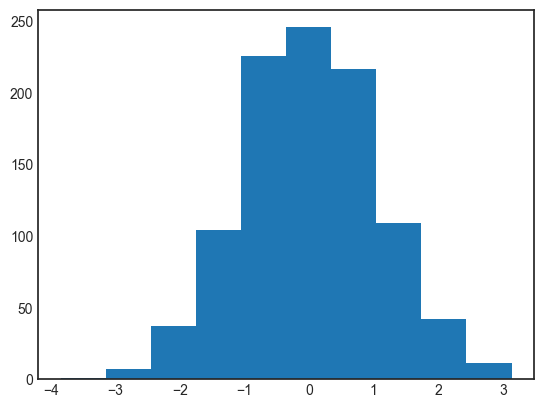

In [25]:
# 개수가 작을수록(예.100) 데이터가 분산되고
# 개수가 많을수록(예.100000) 데이터가 평균(중앙)에 밀집함
plt.hist(data);

hist()람수는 계솬과 표현 모두 조정할 수 있는 많은 옵션을 제공함

- bins : 데이터를 나누는 구간(막대)의 개수를 설정
(숫자가 아닌 배열로 제공하면 특정 경계값으로 직접 구간을 지정도 가능)

- alpha : 투명도

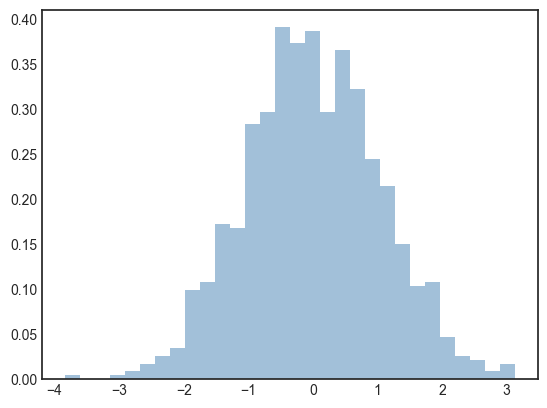

In [27]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

다양한 분포에 대한 히스토그램을 비교할때 histtype='stepfilled' 과 투명도 alpha를 결합하면 매우 유용

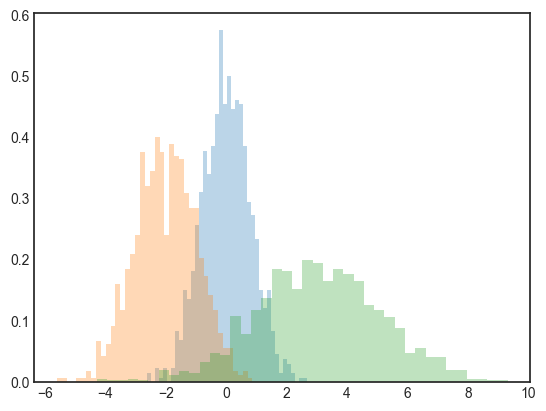

In [ ]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

#스타일을 딕셔너리 형태로 만들어서 전달
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

# 1차원 히스토그램 : 1차원 데이터에 대한 빈도를 체크하는 것
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### 2차원 히스토그램과 구간화

다변량 가우스분포를 띄는 x와 y 배열을 정의

In [36]:
#x, y의 평균이 각각 0, 0
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

In [31]:
print(x.shape)
print(y.shape)

(10000,)
(10000,)


#### plt.hist2d : 2차원 히스토그램

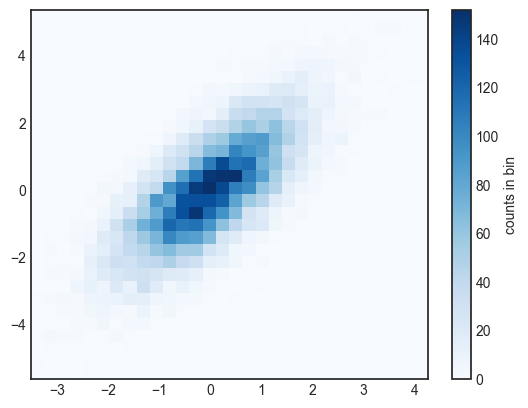

In [37]:
plt.hist2d(x, y, bins=30, cmap='Blues') #2차원 데이터 : (x, y)
cb = plt.colorbar()
cb.set_label('counts in bin')

#### 커널 밀도 추정

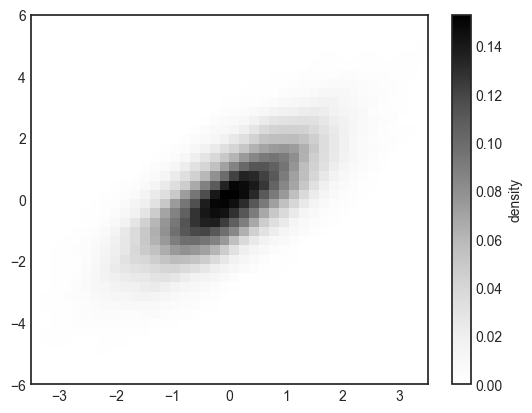

In [39]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")